In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from datetime import timedelta, date, time,datetime
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv("logs/data.csv",index_col = 0)
df.index = pd.to_datetime(df.index)

In [4]:
locations = [loc for loc in df.columns if ">" not in loc]
transit_locs = [loc for loc in df.columns if ">" in loc ]

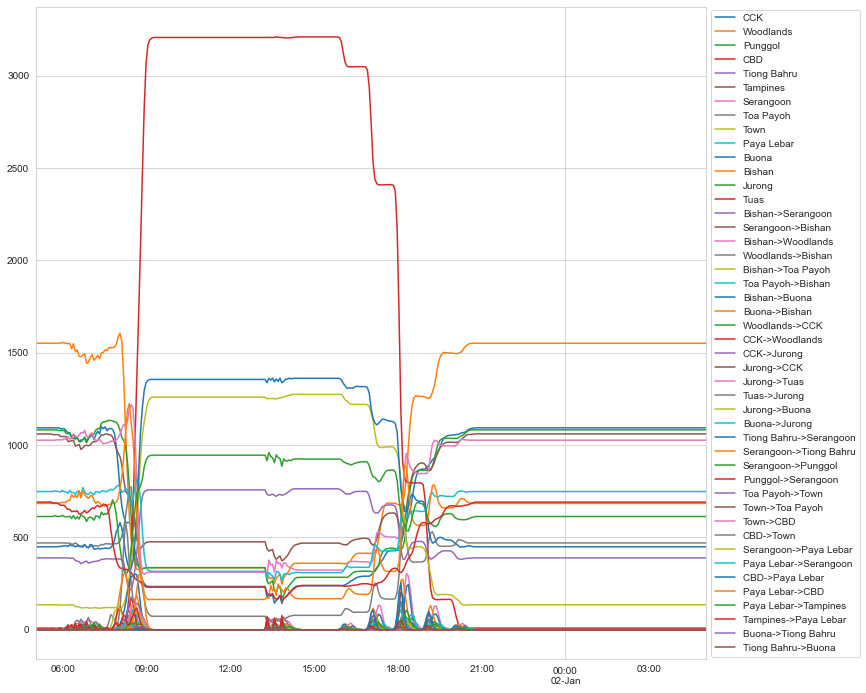

In [5]:
d1 = df.index[0] + timedelta(days=1)
df[:d1].plot(figsize=(12,12))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

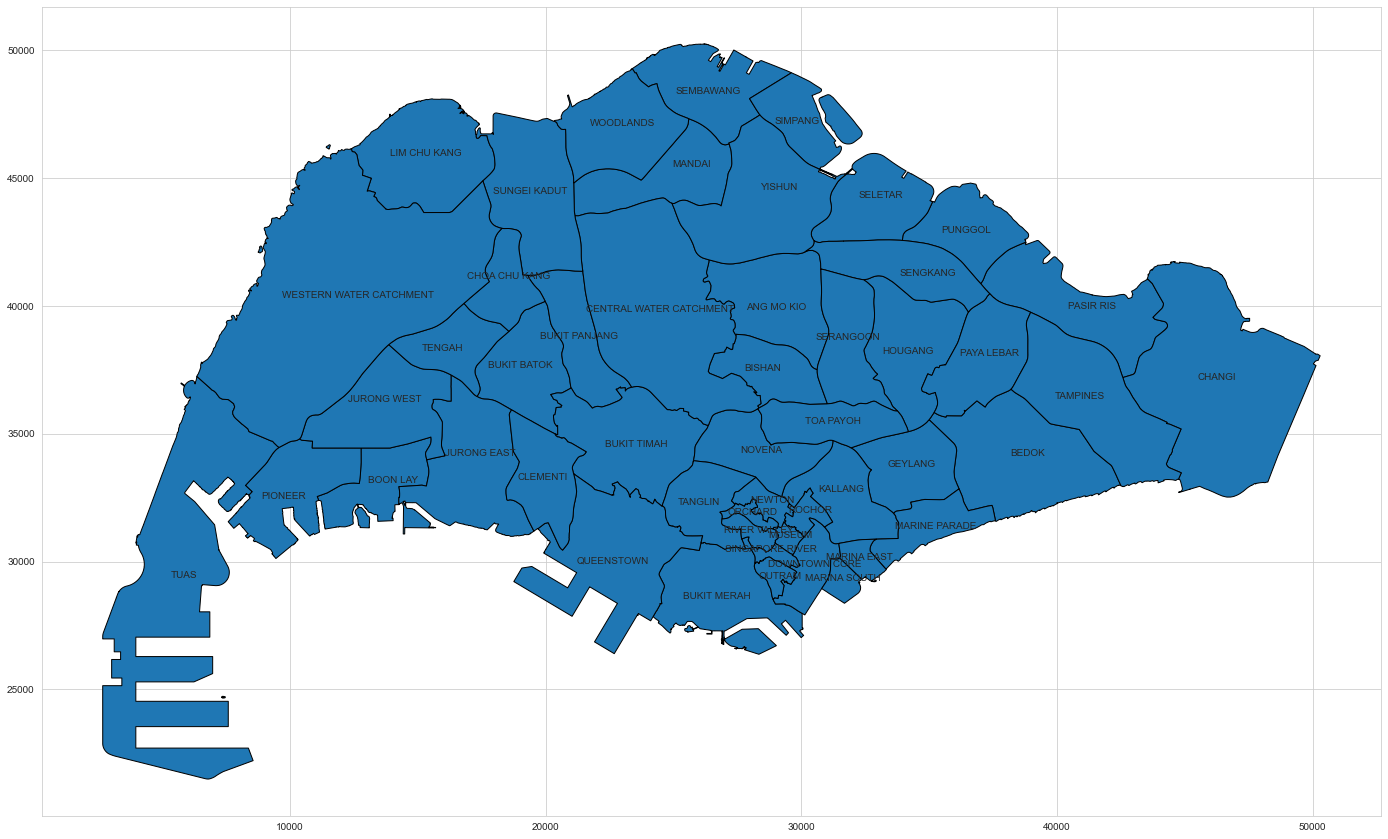

In [236]:
region_shp = "assets/plan-shp/MP14_PLNG_AREA_NO_SEA_PL.shp"
region_map = gpd.read_file(region_shp)

region_map["coords"] = region_map["geometry"].apply(lambda x:x.representative_point().coords[0])
to_remove = [17,40,44,46,48]
# region_map.drop(to_remove,inplace = True)

fig,ax = plt.subplots(figsize = (24,24))
for _,row in region_map.drop(to_remove).iterrows():
    plt.annotate(s=row["PLN_AREA_N"],xy = row["coords"],horizontalalignment = "center")
region_map.drop(to_remove).plot(ax = ax,edgecolor = 'black')
my_map = region_map.copy()

In [237]:
region_map["coords"]

0       (29023.568105901686, 39843.6423499994)
1     (38856.419273022446, 34137.594849999994)
2        (28491.32818169766, 37472.0848000003)
3      (14030.069484229543, 33071.70069999993)
4      (19021.345816471498, 37562.43989999965)
5      (26699.197063940854, 28548.51319999993)
6       (21292.23093576192, 38695.00435000006)
7      (23534.159650649435, 34508.16365000047)
8      (34291.614188136045, 33713.09324999992)
9     (31546.080321570713, 32716.407750000246)
10     (28435.113003414663, 34257.98755000066)
11      (41385.03175321553, 39881.07655000035)
12     (34174.42628975086, 38112.048849999905)
13    (17440.728134819175, 34150.674150000326)
14     (15304.309315681707, 45858.67010000069)
15    (25718.227727346413, 45427.345250000246)
16     (35258.19506235821, 31273.771750000305)
17      (52404.68912716706, 41230.33710000012)
18     (9751.742467763264, 32466.325000000186)
19             (13698.949895112139, 36233.625)
20    (37355.199178810304, 38068.898200000636)
21     (36439

In [238]:
my_map2.coords

0      (26283.75284008892, 39762.467349999584)
1        (22264.9955609592, 33657.87344999984)
2     (28472.247866222966, 29048.057350000367)
3      (13982.757254394273, 41289.01560000051)
4     (14634.784835792008, 34736.951150000095)
5       (37104.81296266442, 34842.50569999963)
6       (34619.10715255545, 42868.51269999985)
7      (33394.469111625105, 38252.69330000039)
8      (44352.68930110536, 37507.518849999644)
9     (22638.403110384905, 29928.053700000048)
10     (28507.707819230753, 34443.51579999924)
11     (26934.885026959426, 32552.80845000036)
12     (5848.183867069068, 29369.437149999663)
13       (24604.4188079932, 45732.78960000072)
Name: coords, dtype: object

In [121]:
my_map

,OBJECTID,PLN_AREA_N,PLN_AREA_C,CA_IND,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry,coords
0,1,ANG MO KIO,AM,N,NORTH-EAST REGION,NER,E5CBDDE0C2113055,2016-05-11,28976.8763,40229.1238,17494.240190,1.394138e+07,"POLYGON ((30658.500 42047.527, 30679.195 42020...","(29023.568105901686, 39843.6423499994)"
1,2,BEDOK,BD,N,EAST REGION,ER,1719251260799DF6,2016-05-11,38582.6650,34032.0961,21872.798962,2.173319e+07,"POLYGON ((38974.269 36138.243, 39371.471 35747...","(38856.419273022446, 34137.594849999994)"
2,3,BISHAN,BS,N,CENTRAL REGION,CR,BA616285F402846F,2016-05-11,28789.7630,37450.8865,13517.121556,7.618921e+06,"POLYGON ((29772.191 38311.805, 29784.826 38304...","(28491.32818169766, 37472.0848000003)"
3,4,BOON LAY,BL,N,WEST REGION,WR,A3DC87118B43CDED,2016-05-11,13410.3824,33008.9884,18528.467448,8.279408e+06,"POLYGON ((12861.383 32207.492, 12860.555 32208...","(14030.069484229543, 33071.70069999993)"
4,5,BUKIT BATOK,BK,N,WEST REGION,WR,FB44C870B04B7F57,2016-05-11,19255.4150,37527.6527,15234.223423,1.113326e+07,"POLYGON ((20294.455 39114.528, 20334.318 39054...","(19021.345816471498, 37562.43989999965)"
5,6,BUKIT MERAH,BM,N,CENTRAL REGION,CR,738B479882E4EE28,2016-05-11,26865.7838,28662.8732,29156.293788,1.446247e+07,"POLYGON ((26228.631 30746.197, 26231.960 30743...","(26699.197063940854, 28548.51319999993)"
6,7,BUKIT PANJANG,BP,N,WEST REGION,WR,4A9C6E6BAF7BE998,2016-05-11,21287.0436,38761.8448,15891.853279,9.019940e+06,"POLYGON ((21448.724 41356.741, 21508.535 40890...","(21292.23093576192, 38695.00435000006)"
7,8,BUKIT TIMAH,BT,N,CENTRAL REGION,CR,C893AEAD20F42559,2016-05-11,23256.7643,34689.0037,22492.840844,1.752665e+07,"POLYGON ((24031.387 36694.742, 24076.658 36657...","(23534.159650649435, 34508.16365000047)"
8,9,GEYLANG,GL,N,CENTRAL REGION,CR,957AC76DACFDE12E,2016-05-11,34255.0407,33683.8190,12959.116844,9.643156e+06,"POLYGON ((35619.754 32450.586, 35588.223 32427...","(34291.614188136045, 33713.09324999992)"
9,10,KALLANG,KL,N,CENTRAL REGION,CR,229F1481FF686959,2016-05-11,31685.3730,32515.7735,15584.137724,9.169902e+06,"POLYGON ((31277.373 34723.293, 31305.947 34712...","(31546.080321570713, 32716.407750000246)"


In [243]:
#Insert all change to my_map here
df = pd.read_csv("data/locations_data.csv")
my_map = region_map.copy()
to_remove = [17,40,44,46,48]
water_regions = [27,49]
water_regions = my_map.iloc[water_regions]
my_map.drop(to_remove,inplace = True)
loc_map = ["Bishan","Paya Lebar","Bishan","Jurong","CCK","CBD","CCK","Buona","Paya Lebar","Town","Toa Payoh","Tampines","Serangoon","Jurong","CCK","Woodlands",
"Paya Lebar","Tuas","Jurong","Paya Lebar","Punggol","Tiong Bahru","Punggol","Woodlands","Punggol","Serangoon","Bishan","Tampines","Woodlands","Tampines","CBD",
"Town","CCK","Toa Payoh","Paya Lebar","Woodlands","CBD","CBD","Town","CCK","Buona","CBD","Woodlands","Tuas","CCK","Woodlands","Town","CBD","Town","Town"]
my_map["location"] = loc_map
my_map2 = my_map.dissolve(by="location").reset_index()
# my_map2 = my_map2.merge(df,on = "location")
my_map2["coords"] = my_map2["geometry"].apply(lambda x:(x.representative_point().x,x.representative_point().y))

In [244]:
len(loc_map),len(my_map)

(50, 50)

In [245]:
list(zip(my_map.PLN_AREA_N,loc_map))

[('ANG MO KIO', 'Bishan'),
 ('BEDOK', 'Paya Lebar'),
 ('BISHAN', 'Bishan'),
 ('BOON LAY', 'Jurong'),
 ('BUKIT BATOK', 'CCK'),
 ('BUKIT MERAH', 'CBD'),
 ('BUKIT PANJANG', 'CCK'),
 ('BUKIT TIMAH', 'Buona'),
 ('GEYLANG', 'Paya Lebar'),
 ('KALLANG', 'Town'),
 ('NOVENA', 'Toa Payoh'),
 ('PASIR RIS', 'Tampines'),
 ('HOUGANG', 'Serangoon'),
 ('JURONG EAST', 'Jurong'),
 ('LIM CHU KANG', 'CCK'),
 ('MANDAI', 'Woodlands'),
 ('MARINE PARADE', 'Paya Lebar'),
 ('PIONEER', 'Tuas'),
 ('JURONG WEST', 'Jurong'),
 ('PAYA LEBAR', 'Paya Lebar'),
 ('PUNGGOL', 'Punggol'),
 ('QUEENSTOWN', 'Tiong Bahru'),
 ('SELETAR', 'Punggol'),
 ('SEMBAWANG', 'Woodlands'),
 ('SENGKANG', 'Punggol'),
 ('SERANGOON', 'Serangoon'),
 ('CENTRAL WATER CATCHMENT', 'Bishan'),
 ('CHANGI', 'Tampines'),
 ('SUNGEI KADUT', 'Woodlands'),
 ('TAMPINES', 'Tampines'),
 ('DOWNTOWN CORE', 'CBD'),
 ('TANGLIN', 'Town'),
 ('TENGAH', 'CCK'),
 ('TOA PAYOH', 'Toa Payoh'),
 ('MARINA EAST', 'Paya Lebar'),
 ('WOODLANDS', 'Woodlands'),
 ('MARINA SOUTH', 'C

No handles with labels found to put in legend.


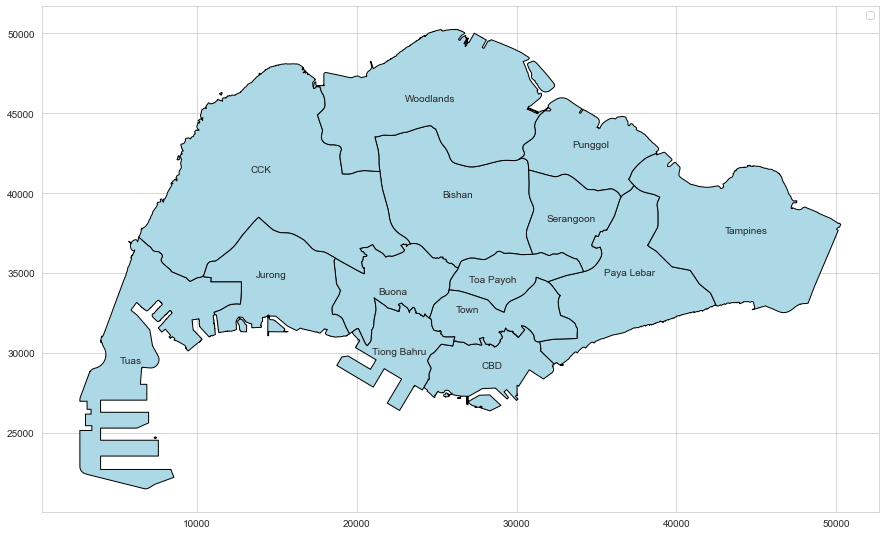

In [247]:
fig,ax = plt.subplots(figsize = (15,15))
my_map2.plot(ax = ax,color = "lightblue",edgecolor = 'black',legend = True)
for idx,row in my_map2.iterrows():
     plt.annotate(s=row["location"],xy = row["coords"],horizontalalignment = "center")
plt.legend()
#water_regions.plot(ax = ax,color = 'blue', edgecolor = 'blue')
#gpd.GeoDataFrame(my_map.loc[45]).T.plot(ax = ax,color = 'green')

In [248]:
my_map[["location","PLN_AREA_N"]]

,location,PLN_AREA_N
0,Bishan,ANG MO KIO
1,Paya Lebar,BEDOK
2,Bishan,BISHAN
3,Jurong,BOON LAY
4,CCK,BUKIT BATOK
5,CBD,BUKIT MERAH
6,CCK,BUKIT PANJANG
7,Buona,BUKIT TIMAH
8,Paya Lebar,GEYLANG
9,Town,KALLANG


In [83]:
my_map2["geometry"].representative_point().y

0     39762.46735
1     32379.87365
2     41289.01560
3     33863.56690
4     34842.50570
5     39955.28775
6     38672.04105
7     37507.51885
8     29928.05370
9     34443.51580
10    31833.73475
11    30003.36070
12    45242.56195
dtype: float64

In [96]:
df

,location,num_schools,student_school,student_home,people_home,num_offices,people_work,avg_income
0,Bishan,26,57600,42740,207120,1,16870,2368.52
1,Serangoon,52,62530,60190,282380,3,50609,2452.21
2,Woodlands,50,70040,127590,443850,1,16870,2367.31
3,Toa Payoh,15,21160,30060,139810,0,0,2354.37
4,Buona,20,74900,34190,154570,22,371130,2313.47
5,CCK,42,56380,89180,319390,0,0,2446.40
6,Jurong,39,59970,43840,189140,15,253043,2343.79
7,Tuas,1,23000,56690,208190,0,26000,2373.00
8,Tiong Bahru,6,6840,26160,127690,12,202435,2290.22
9,Punggol,17,20100,114110,301330,1,16870,2402.87


In [74]:
len(locations)

14